In [7]:
import kagglehub
path = kagglehub.dataset_download("jayjoshi37/customer-subscription-churn-and-usage-patterns")

Using Colab cache for faster access to the 'customer-subscription-churn-and-usage-patterns' dataset.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/customer_subscription_churn_usage_patterns.csv")
df.head()

,user_id,signup_date,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
0,1,2023-04-15,Premium,699,1.1,4,1,8,14,Yes
1,2,2023-08-27,Premium,699,2.6,6,0,35,1,Yes
2,3,2023-10-12,Premium,699,14.3,8,3,2,14,Yes
3,4,2023-12-11,Basic,199,17.6,5,2,11,9,Yes
4,5,2023-02-14,Basic,199,9.8,5,2,6,38,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 2800 non-null   int64  
 1   signup_date             2800 non-null   object 
 2   plan_type               2800 non-null   object 
 3   monthly_fee             2800 non-null   int64  
 4   avg_weekly_usage_hours  2800 non-null   float64
 5   support_tickets         2800 non-null   int64  
 6   payment_failures        2800 non-null   int64  
 7   tenure_months           2800 non-null   int64  
 8   last_login_days_ago     2800 non-null   int64  
 9   churn                   2800 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 218.9+ KB


In [12]:
df.describe()

,user_id,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1400.500000,434.214286,12.891429,3.887857,2.491786,18.612857,30.005000
std,808.434702,205.678472,7.109691,2.606419,1.691647,10.374487,17.852757
min,1.000000,199.000000,0.500000,0.000000,0.000000,1.000000,0.000000
25%,700.750000,199.000000,6.700000,2.000000,1.000000,10.000000,14.000000
50%,1400.500000,399.000000,12.800000,4.000000,2.000000,18.000000,30.000000
75%,2100.250000,699.000000,19.200000,6.000000,4.000000,27.000000,46.000000
max,2800.000000,699.000000,25.000000,8.000000,5.000000,36.000000,60.000000


In [14]:
df.isnull().sum()

,0
user_id,0
signup_date,0
plan_type,0
monthly_fee,0
avg_weekly_usage_hours,0
support_tickets,0
payment_failures,0
tenure_months,0
last_login_days_ago,0
churn,0


In [17]:
k=df.duplicated().sum()
k

np.int64(0)

In [19]:
df.groupby(['plan_type','churn']).count()

user_id  signup_date  monthly_fee  avg_weekly_usage_hours  \
plan_type churn                                                              
Basic     No         389          389          389                     389   
          Yes        534          534          534                     534   
Premium   No         396          396          396                     396   
          Yes        548          548          548                     548   
Standard  No         410          410          410                     410   
          Yes        523          523          523                     523   

                 support_tickets  payment_failures  tenure_months  \
plan_type churn                                                     
Basic     No                 389               389            389   
          Yes                534               534            534   
Premium   No                 396               396            396   
          Yes                548               548            548   
Standard  No                 410               410            410   
          Yes                523               523            523   

                 last_login_days_ago  
plan_type churn                       
Basic     No                     389  
          Yes                    534  
Premium   No                     396  
          Yes                    548  
Standard  No                     410  
          Yes                    523

In [21]:
df.groupby(['churn']).count()

,user_id,signup_date,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago
churn,,,,,,,,,
No,1195,1195,1195,1195,1195,1195,1195,1195,1195
Yes,1605,1605,1605,1605,1605,1605,1605,1605,1605


Text(0.5, 1.0, 'Correlation Matrix')

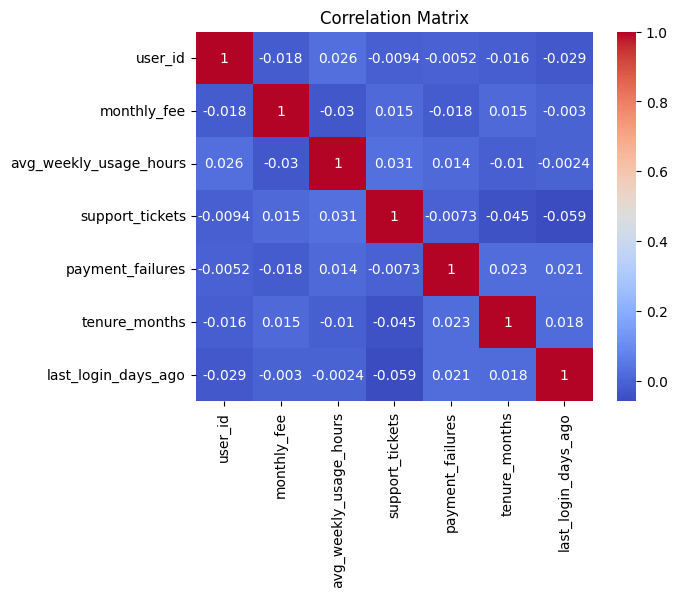

In [26]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


In [29]:
df.groupby(['churn','support_tickets'])
df

,user_id,signup_date,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
0,1,2023-04-15,Premium,699,1.1,4,1,8,14,Yes
1,2,2023-08-27,Premium,699,2.6,6,0,35,1,Yes
2,3,2023-10-12,Premium,699,14.3,8,3,2,14,Yes
3,4,2023-12-11,Basic,199,17.6,5,2,11,9,Yes
4,5,2023-02-14,Basic,199,9.8,5,2,6,38,Yes
...,...,...,...,...,...,...,...,...,...,...
2795,2796,2023-03-10,Standard,399,6.7,1,1,21,59,No
2796,2797,2024-11-20,Standard,399,11.0,4,0,6,4,No
2797,2798,2024-08-13,Standard,399,11.0,0,4,22,59,No
2798,2799,2024-05-23,Premium,699,15.0,3,4,25,20,No


<Axes: >

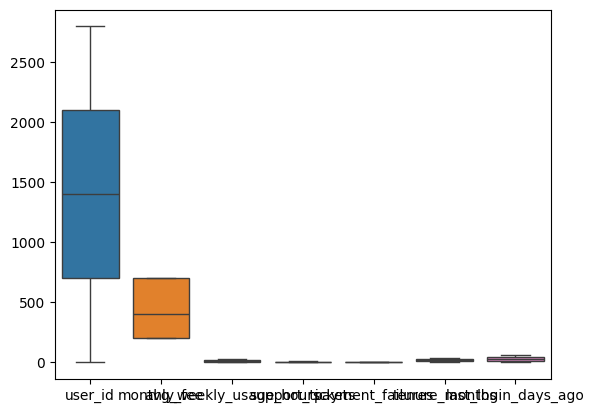

In [31]:
sns.boxplot(data=df)


In [34]:

df_modified = df.drop('user_id', axis=1)



df_multiple_columns_dropped = df.drop(columns=['user_id', 'signup_date'])


display(df_modified.head())

,signup_date,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
0,2023-04-15,Premium,699,1.1,4,1,8,14,Yes
1,2023-08-27,Premium,699,2.6,6,0,35,1,Yes
2,2023-10-12,Premium,699,14.3,8,3,2,14,Yes
3,2023-12-11,Basic,199,17.6,5,2,11,9,Yes
4,2023-02-14,Basic,199,9.8,5,2,6,38,Yes


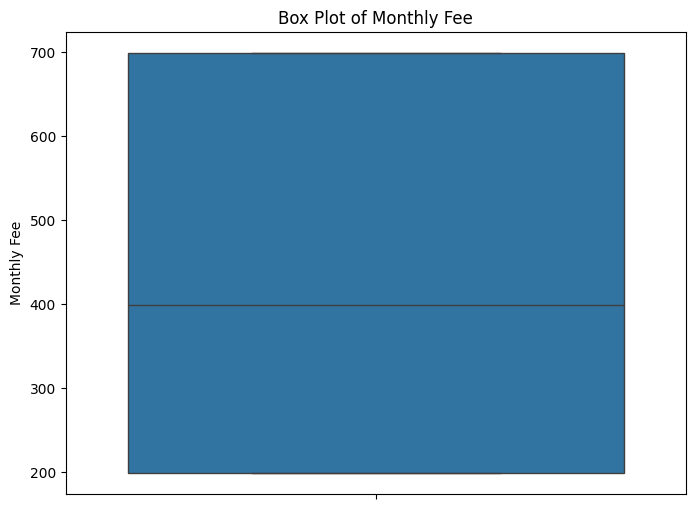

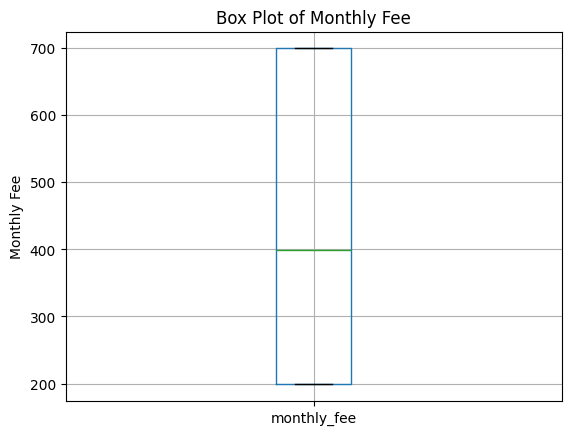

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['monthly_fee'])
plt.title('Box Plot of Monthly Fee')
plt.ylabel('Monthly Fee')
plt.show()

# Alternatively, using pandas built-in plotting:
df.boxplot(column=['monthly_fee'])
plt.title('Box Plot of Monthly Fee')
plt.ylabel('Monthly Fee')
plt.show()

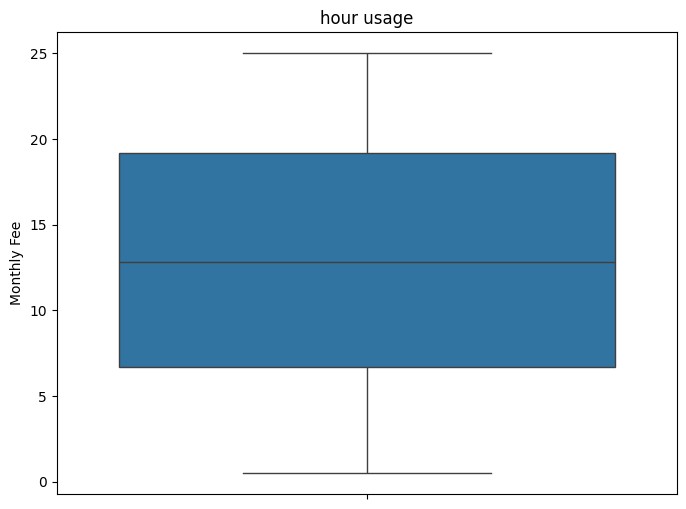

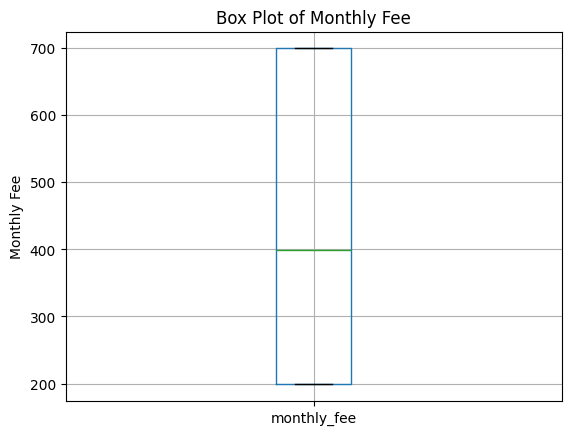

In [39]:

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['avg_weekly_usage_hours'])
plt.title('hour usage')
plt.ylabel('hour usage')
plt.show()



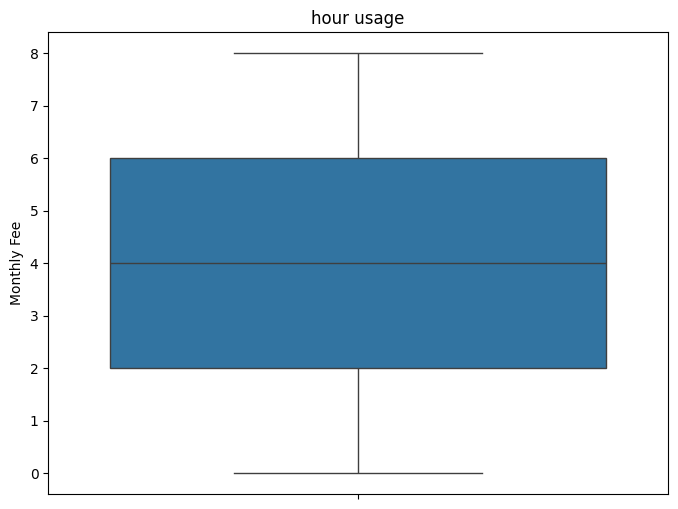

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['support_tickets'])
plt.title('hour usage')
plt.ylabel('Monthly Fee')
plt.show()

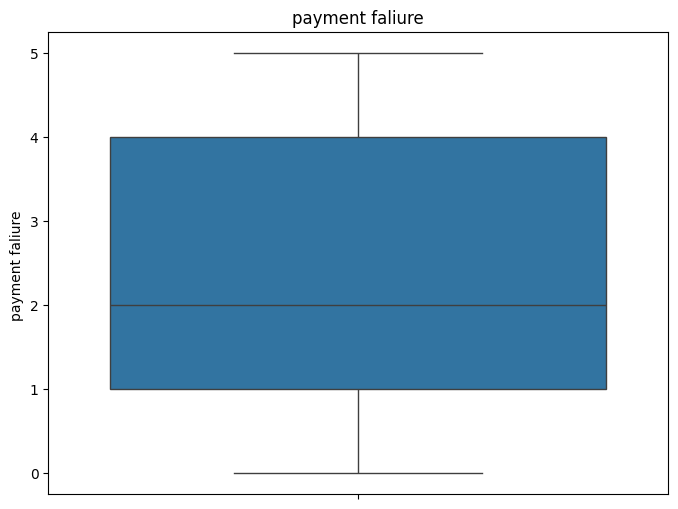

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['payment_failures'])
plt.title('payment faliure')
plt.ylabel('payment faliure ')
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 2800 non-null   int64  
 1   signup_date             2800 non-null   object 
 2   plan_type               2800 non-null   object 
 3   monthly_fee             2800 non-null   int64  
 4   avg_weekly_usage_hours  2800 non-null   float64
 5   support_tickets         2800 non-null   int64  
 6   payment_failures        2800 non-null   int64  
 7   tenure_months           2800 non-null   int64  
 8   last_login_days_ago     2800 non-null   int64  
 9   churn                   2800 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 218.9+ KB


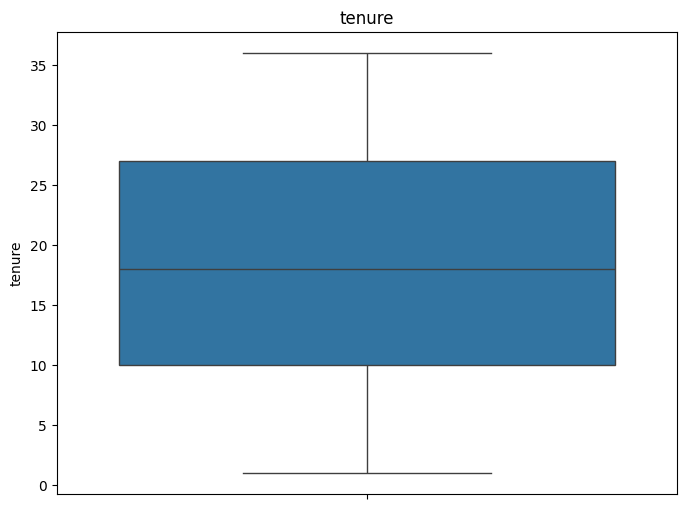

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['tenure_months'])
plt.title('tenure')
plt.ylabel('tenure')
plt.show()

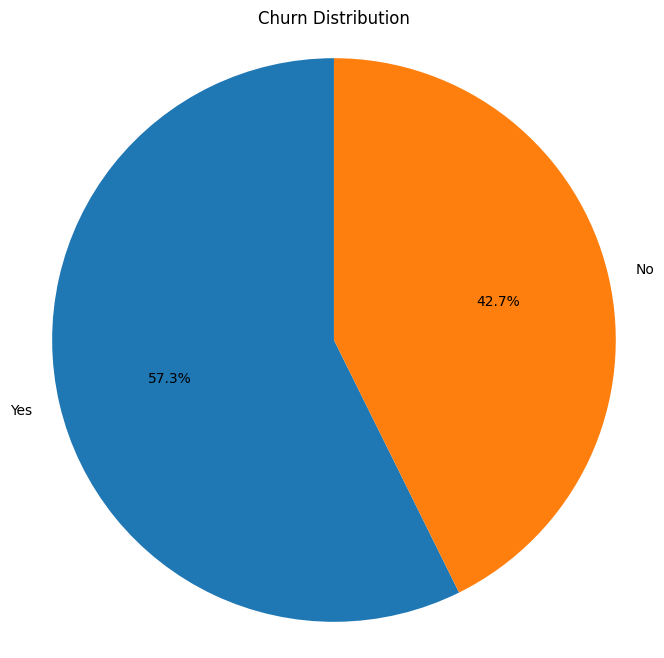

In [46]:
import matplotlib.pyplot as plt


churn_counts = df['churn'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

   churn  signup_month  count
0     No             1     87
1     No             2     69
2     No             3    105
3     No             4    104
4     No             5    119
5     No             6     97
6     No             7    121
7     No             8     94
8     No             9     83
9     No            10    116
10    No            11     97
11    No            12    103
12   Yes             1    133
13   Yes             2    128
14   Yes             3    131
15   Yes             4    133
16   Yes             5    140
17   Yes             6    125
18   Yes             7    129
19   Yes             8    157
20   Yes             9    128
21   Yes            10    133
22   Yes            11    121
23   Yes            12    147


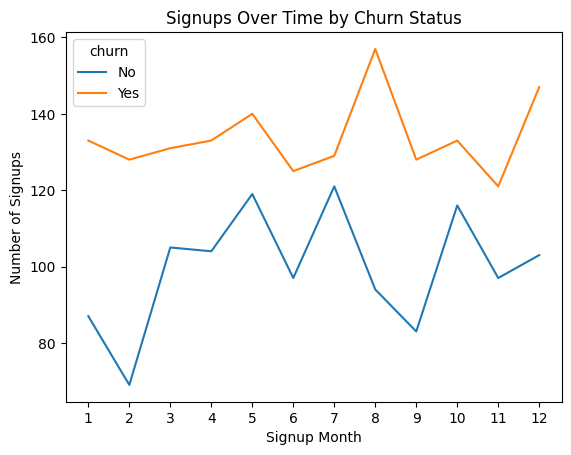

In [57]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
date_counts = df.groupby(['churn', df['signup_date'].dt.month]).size().reset_index(name='count')
date_counts = date_counts.rename(columns={'signup_date': 'signup_month'})

print(date_counts)

import seaborn as sns
sns.lineplot(data=date_counts, x='signup_month', y='count', hue='churn')
plt.title('Signups Over Time by Churn Status')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.xticks(range(1, 13))
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


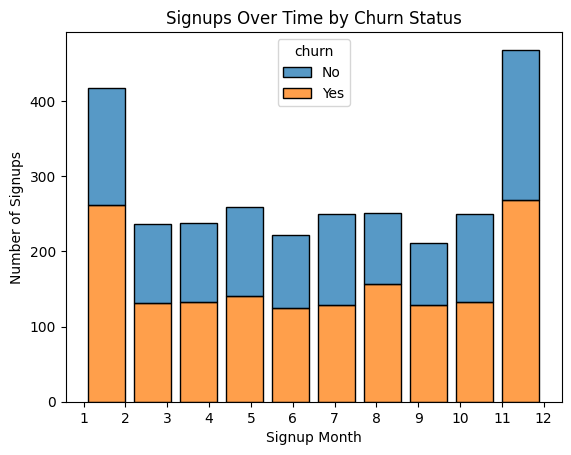

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.histplot(data=date_counts, x='signup_month', weights='count', hue='churn', multiple='stack', shrink=0.8)
plt.title('Signups Over Time by Churn Status')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.xticks(range(1, 13))
plt.show()

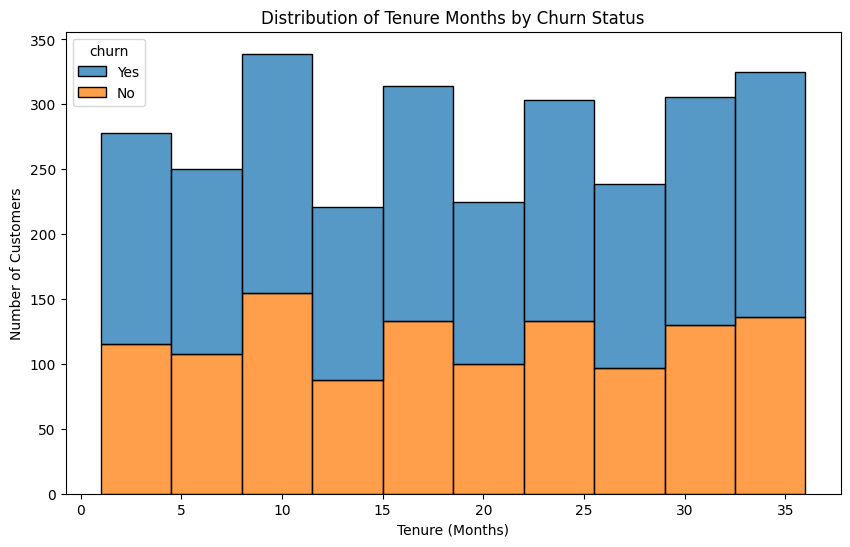

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure_months', hue='churn', multiple='stack', bins=10)
plt.title('Distribution of Tenure Months by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

In [73]:
df[['tenure_months', 'support_tickets']].describe()

,tenure_months,support_tickets
count,2800.000000,2800.000000
mean,18.612857,3.887857
std,10.374487,2.606419
min,1.000000,0.000000
25%,10.000000,2.000000
50%,18.000000,4.000000
75%,27.000000,6.000000
max,36.000000,8.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 2800 non-null   int64         
 1   signup_date             2800 non-null   datetime64[ns]
 2   plan_type               2800 non-null   object        
 3   monthly_fee             2800 non-null   int64         
 4   avg_weekly_usage_hours  2800 non-null   float64       
 5   support_tickets         2800 non-null   int64         
 6   payment_failures        2800 non-null   int64         
 7   tenure_months           2800 non-null   int64         
 8   last_login_days_ago     2800 non-null   int64         
 9   churn                   2800 non-null   object        
 10  DateTime                2800 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 240.8+ KB


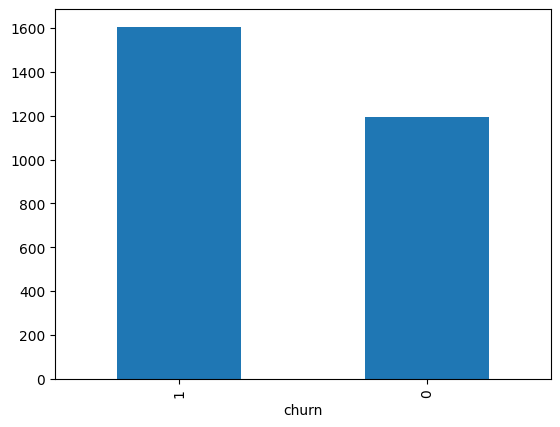

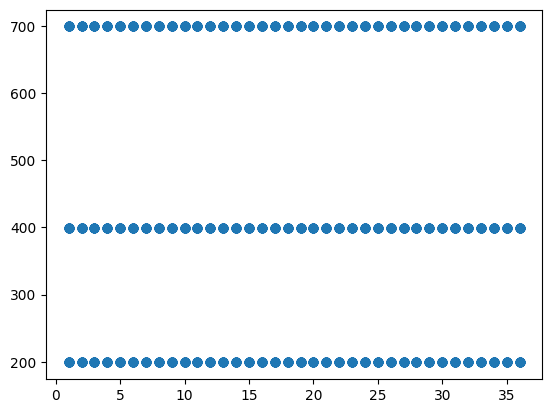

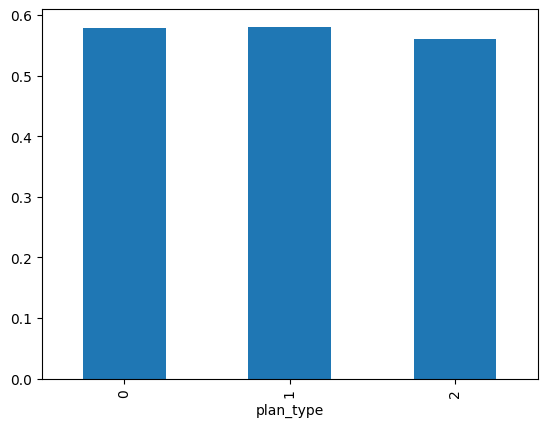

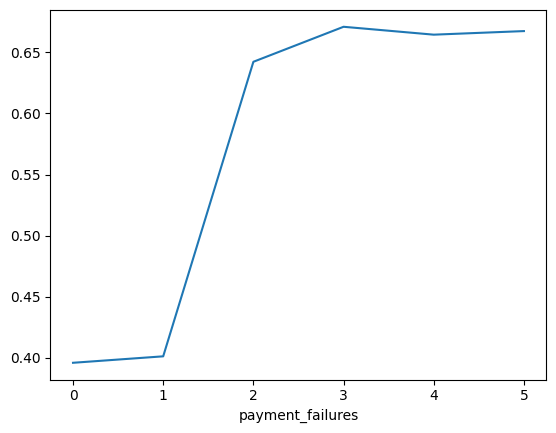

0.6321428571428571
0.6705856226567908
              precision    recall  f1-score   support

           0       0.57      0.50      0.54       237
           1       0.67      0.73      0.70       323

    accuracy                           0.63       560
   macro avg       0.62      0.61      0.62       560
weighted avg       0.63      0.63      0.63       560



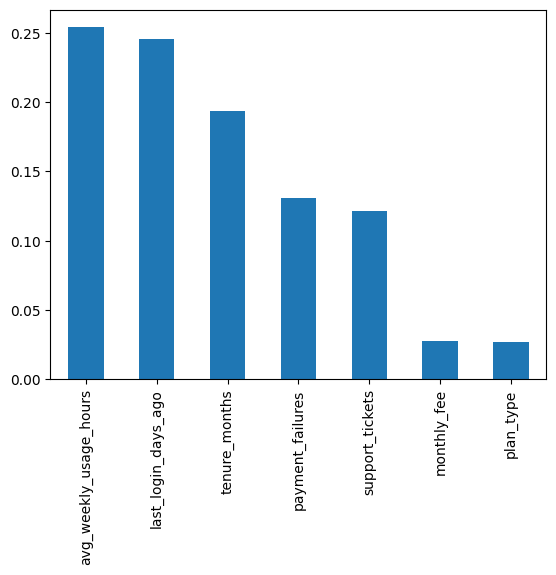

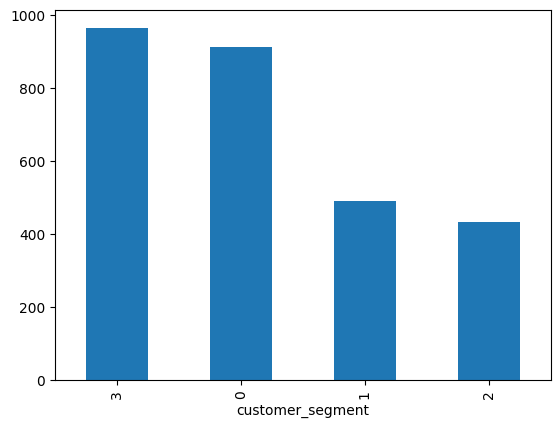

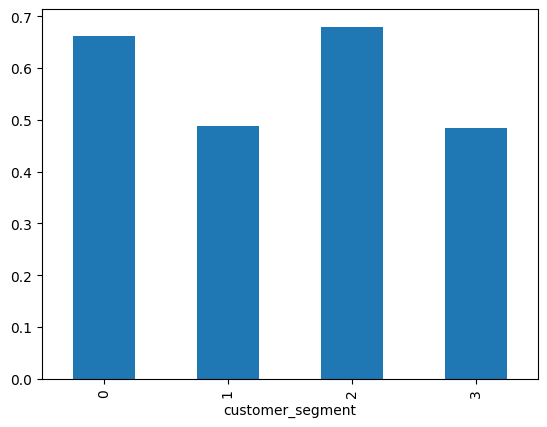

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.cluster import KMeans

df.columns = df.columns.str.lower().str.strip()

plan_col = [c for c in df.columns if "plan" in c][0]

# Encode object columns
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

plt.figure()
df["churn"].value_counts().plot(kind="bar")
plt.show()

plt.figure()
plt.scatter(df["tenure_months"], df["monthly_fee"])
plt.show()

plt.figure()
df.groupby(plan_col)["churn"].mean().plot(kind="bar")
plt.show()

plt.figure()
df.groupby("payment_failures")["churn"].mean().plot()
plt.show()

# Drop non-numeric and irrelevant columns for modeling
X = df.drop(columns=["churn", "signup_date", "user_id", "datetime"])
y = df["churn"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]

print(accuracy_score(y_test, pred))
print(roc_auc_score(y_test, prob))
print(classification_report(y_test, pred))

importance = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False).head(10)

plt.figure()
importance.plot(kind="bar")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto') # Added n_init='auto' to suppress warning
clusters = kmeans.fit_predict(X_scaled)
df["customer_segment"] = clusters

plt.figure()
df["customer_segment"].value_counts().plot(kind="bar")
plt.show()

retention = df.groupby("customer_segment")["churn"].mean()

plt.figure()
retention.plot(kind="bar")
plt.show()